# Project 4 - Part 3: Exploratory data analysis and modelling mean salary

# 3.1 Import packages

In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# 3.2 Load data

In [109]:
file = 'jobs_clean.csv'
jobs = pd.read_csv(file, index_col=0)

In [110]:
jobs.head(2)

,index,company,title,salary_low,salary_high,salary_mean,title_data,title_analyst,title_scientist,title_senior,...,skill_python,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka
0,0,Allianz,DATA SCIENTIST,NaN,NaN,NaN,0.601265,0.0,0.799049,0.0,...,1,0,0,0,1,0,1,0,0,0
1,1,Teradata,Data Scientist,NaN,NaN,NaN,0.601265,0.0,0.799049,0.0,...,1,1,1,0,1,1,0,0,0,0


# 3.3 Exploratory Data Analysis

# 3.3.1 Summary statistics

In [111]:
#Let's begin by looking at the summary statistics
jobs.describe()

,index,salary_low,salary_high,salary_mean,title_data,title_analyst,title_scientist,title_senior,title_engineer,title_business,...,skill_python,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka
count,478.000000,98.000000,98.000000,98.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.000000,478.000000,478.0,478.000000,478.000000,478.000000,478.000000,478.000000
mean,389.163180,101316.530612,118908.704082,110112.617347,0.153416,0.147104,0.102653,0.056888,0.045828,0.040662,...,0.309623,0.098326,0.077406,0.102510,1.0,0.497908,0.154812,0.027197,0.056485,0.033473
std,232.441987,36850.461484,39782.587953,37320.319603,0.225103,0.191373,0.227025,0.156744,0.146152,0.165214,...,0.462823,0.298067,0.267514,0.303636,0.0,0.500519,0.362104,0.162826,0.231098,0.180056
min,0.000000,30680.000000,30680.000000,30680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.250000,76471.500000,90000.000000,83495.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,366.500000,94300.500000,116138.000000,105000.000000,0.000000,0.113161,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,589.750000,119250.000000,142250.000000,128750.000000,0.268579,0.233800,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,796.000000,260000.000000,260000.000000,260000.000000,0.753361,1.000000,1.000000,0.872952,0.860222,0.912043,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


The summary statistics tell us a few things, particularly about salary information. Firstly, that only a minority of our data 
actually has salary information (90 records out of 441 total). This may be a limitation for our modelling and predictions.

However, of the jobs that do list their salary information, a few descriptive statistics of note are apparent. Firstly, the 
average offered salary range for data science/analytics jobs in Australia is 95216 - 112513, with the average mean salary being 103864. Salary varies over a large range though, with the lowest paid jobs paying only 30680, while the highest amount potentially
on offer is 312000.

# 3.3.2 Target variable distributions

In [112]:
#Before we can look at distributions for the salary data, we need to limit our rows only to those which have values for salary
jobs_subset = jobs[jobs.salary_low.isnull() == False]
jobs_subset.shape

(98, 5056)

In [113]:
#How are the salary variables distributed?
def distribution(values, xlabel, title):
    fig = plt.figure(figsize=(6,4))
    sns.distplot(values, bins = 20,kde=False)
    plt.axvline(x=np.mean(values), linestyle='dashed', color='black', alpha=0.8)
    plt.axvline(x=np.median(values), linestyle='dashed', color = 'r', alpha=0.8)
    plt.ylabel('frequency')
    plt.xlabel(xlabel)
    plt.title(title)

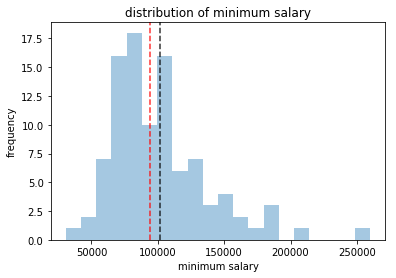

In [114]:
distribution(jobs_subset['salary_low'], 'minimum salary', 'distribution of minimum salary')

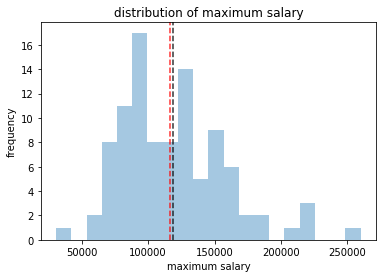

In [115]:
distribution(jobs_subset['salary_high'], 'maximum salary', 'distribution of maximum salary')

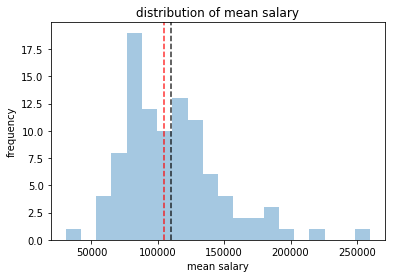

In [116]:
distribution(jobs_subset['salary_mean'], 'mean salary', 'distribution of mean salary')

Minimum, maximum and mean salary are all somewhat positively skewed. While most of the jobs listed are around the approximately 
100k average, there are a few that are considerably lower and several that are much higher. The distribution of salaries is also
discontinuous, with some gaps where there are no jobs listed in that area. I will attempt linear regression to predict this 
variable but I may have more success if I bin the salary variable into categories and attempt to classify jobs into these 
categories.

Let's look at some boxplots to get a closer look at these outliers.

Text(0,0.5,'annual salary (AUD)')

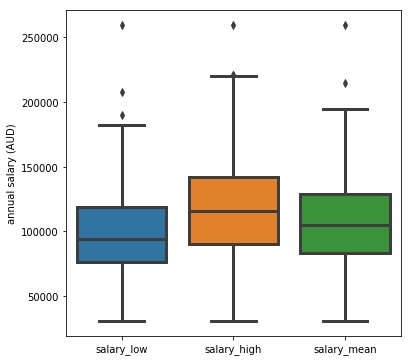

In [117]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(data=jobs_subset[['salary_low','salary_high','salary_mean']],orient='v', linewidth=3)
plt.ylabel('annual salary (AUD)')

The upper range of salaries has more extreme outliers than the other two variables, which makes sense. It's possible that higher-
paid jobs have a wider pay range over which they are willing to negotiate. For this reason, I will stick with mean salary as my 
target variable.

# 3.3.3 Correlations

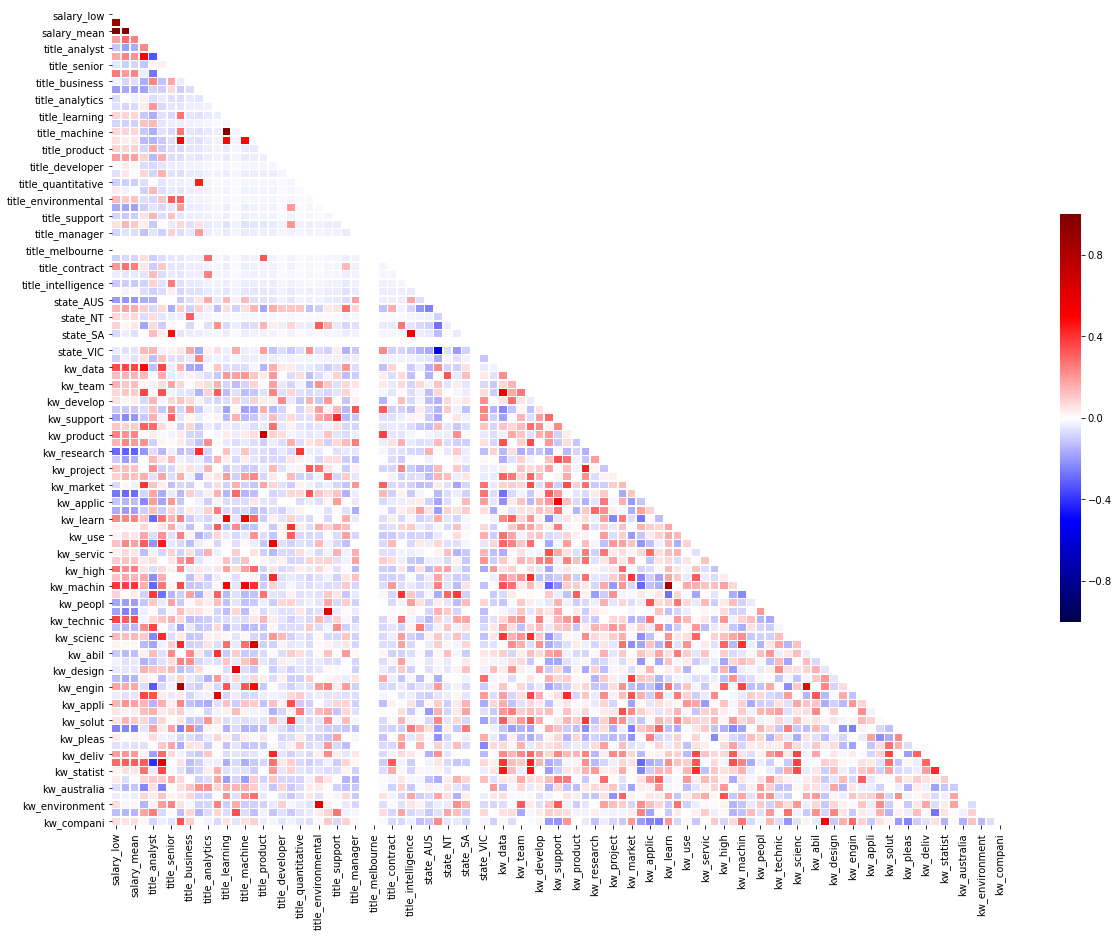

In [118]:
fig = plt.figure(figsize=(20,15))
#Calculate a correlation matrix for the numerical variables
correlations = jobs_subset.iloc[:,3:100].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Make the heatmap
sns.heatmap(correlations, mask = mask, vmin=-1, linewidths=.5, vmax=1, cmap='seismic',cbar_kws={"shrink": .5})

Firstly, the states negatively correlate with one another, which is to be expected given that a job is listed in one state only 
and so these values are mutually exclusive. There's not much we can do about this.

The salary variables are all strongly collinear, this is also to be expected and will not be an issue as I'll only be using the 
salary_mean column as a target variable.

A few other terms show collinearity that might be worth dealing with. Keywords 'machine' and 'learn' are highly correlated, 
suggesting that they're usually used in the phrase 'machine learning'. In this instance it might be a good idea to drop the 
'machine' keyword variable, as this doesn't capture as much information as 'learn' which has a few other potential connotations 
in a data job listing. 'Environmental' in the job title also seems to correlate quite strongly with 'environment' in the summary,
unsurprisingly. I will drop the kw_environment column here. These seem to be the most extreme instances of collinearity, and 
should be alleviated by dropping the columns 'title_machine', 'kw_machin' and 'kw_environment'.

# 3.4 Question 1: Modelling factors that predict mean salary

What keywords in the job title and job summary predict salary? Does the location affect salary? I will first attempt to construct
a linear model to predict mean salary from these variables.

# 3.4.1 Define predictor matrix and target variable

In [119]:
#We'll start by defining a predictor matrix
X = jobs_subset.iloc[:,7:]
#Dropping the columns we found above to be collinear
dropcols = ['title_machine','kw_machin','kw_environment']
X.drop(dropcols,axis=1,inplace=True)

In [120]:
#And the target variable
y = jobs_subset['salary_mean']

In [121]:
#Now do a train-test split, leaving 1/3rd of the data in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)

In [122]:
#Standardize the predictors
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

# 3.4.2 Straightforward linear regression modelling

Prior to any feature selection or regularization, how does a linear model perform on this data?

In [123]:
#Fit the training data to a linear regression
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
#Define a function to get the r2 score for a given model and dataset
def get_r2(model,X,y):
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    return r2

In [125]:
#How good is the fit on the training data?
get_r2(lr, Xs_train, y_train)

1.0

In [126]:
#Evaluate the model on test data
get_r2(lr, Xs_test, y_test)

0.2946065904147124

Just going ahead and fitting these values to a linear regression model yielded a decent $r^2$ for the training data, but a much 
lower one fo the test data, suggesting the model is overfitting to the training data. Variance-reduction methods such as feature
elimination or regularization may help with this issue.

# 3.4.3 Linear regression with regularization

In [127]:
#Starting with ridge regularization, find the optimal alpha value using CV
ridge = RidgeCV(alphas=np.logspace(0,5,200),cv=10)
ridge.fit(Xs_train,y_train)
bestalpha = ridge.alpha_
bestalpha

1.0

In [128]:
optimalridge = Ridge(alpha = bestalpha)
optimalridge.fit(Xs_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [129]:
#Training r2
get_r2(optimalridge, Xs_train, y_train)

0.9999966918337211

In [130]:
#Testing r2
get_r2(optimalridge, Xs_test, y_test)

0.2953057190613424

Ridge regression does not improve the model significantly.

In [131]:
#Lasso regularization
lasso = LassoCV(alphas=np.logspace(0,5,200), cv=10)
lasso.fit(Xs_train, y_train)
bestalpha=lasso.alpha_
bestalpha

C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.0

In [132]:
optimallasso = Lasso(alpha = bestalpha)
optimallasso.fit(Xs_train, y_train)

C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [133]:
#Training r2
get_r2(optimallasso, Xs_train, y_train)

0.9999999932807468

In [134]:
#Testing r2
get_r2(optimallasso, Xs_test, y_test)

-0.5304075299253463

Lasso regression is not doing well either. Perhaps other approaches to feature elimination are needed.

# 3.4.4 Feature selection with Select K-best and Recursive feature elimination

In [135]:
#Start with select k-best
select_f = SelectKBest(f_regression, k=10)
select_f.fit(Xs_train, y_train)

C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


SelectKBest(k=10, score_func=<function f_regression at 0x0000023B39F4DC80>)

In [136]:
kbest = pd.DataFrame({'feature':list(X_train.columns), 'f_regression score':list(select_f.scores_)})

In [137]:
#What are the highest ranked features for select k best?
kbesttop30 = kbest.sort_values('f_regression score', ascending=False).head(50)
#kbesttop30 = kbesttop30[kbesttop30['f_classif score'] != inf]
kbesttop30

,f_regression score,feature
222,21.394019,kw_cloud
102,21.172933,kw_sql
221,20.790907,kw_experienc
1683,19.644824,kw_storag
519,19.143371,kw_hadoop
207,18.989997,kw_analytics
159,18.930366,kw_assist
2380,17.628585,kw_perl
2017,17.628585,kw_hous
2570,17.628585,kw_cleansing


Getting a lot of infinite values using select k best, perhaps RFECV will be a better approach.

In [138]:
#Now try RFECV
lr = LinearRegression()
selector = RFECV(lr, step=0.5, cv=10)
selector.fit(Xs_train, y_train)

rfe = pd.DataFrame({'feature':list(X_train.columns),'ranking':list(selector.ranking_),'support':list(selector.support_)})

In [139]:
#We'll also look at the top 10 ranked features for rfe
rfetop30 = rfe.sort_values('ranking',ascending=True).head(30)

In [140]:
#Let's use the features supported by RFECV
rfesupported = rfe[rfe['support']==True]
len(rfesupported)

2523

In [141]:
#We could also select features that appear in both lists
combined_features = list(set(kbesttop30.feature).intersection(rfesupported.feature))
print(combined_features)

['kw_api', 'kw_hous', 'kw_gateway', 'kw_technic', 'kw_manipulation', 'kw_abov', 'kw_ssolid', 'kw_perl', 'kw_google', 'kw_loading', 'kw_autom', 'kw_details', 'kw_valued', 'kw_web', 'kw_etl', 'kw_bash', 'kw_awsetl', 'kw_assist', 'kw_repositories', 'kw_backend', 'kw_storag', 'kw_etcif', 'kw_experienc', 'kw_data', 'kw_contract', 'kw_powershel', 'kw_noncloud', 'kw_retrial', 'kw_azure', 'kw_cloud', 'kw_analytics', 'kw_db', 'kw_redshift', 'kw_hadoop', 'kw_architects', 'kw_skills', 'skill_aws', 'kw_analysts', 'skill_hadoop', 'kw_flatflles', 'kw_nosql', 'kw_python', 'kw_linear', 'kw_storage', 'kw_etcexperi', 'kw_loyalti', 'skill_python', 'kw_includ', 'kw_cleansing', 'kw_sql']


# 3.4.5 Re-try linear modelling after feature elimination

In [142]:
#Define new predictor matrix
Xsub = X[rfesupported.feature]
#Xsub = X[combined_features]
#Xsub = X[kbesttop30.feature]

#I did a lot of trial and error here to decide which set of selected features to use, in the end using the features supported
#by RFECV only yielded the best results.

In [143]:
#New test/train split
Xsub_train, Xsub_test, y_train, y_test = train_test_split(Xsub, y, test_size=0.5, random_state=11)

In [144]:
#Standardize new predictors
ss = StandardScaler()
Xsub_train = ss.fit_transform(Xsub_train)
Xsub_test = ss.transform(Xsub_test)

In [145]:
#Fit on a linear regression model again
lr = LinearRegression()
lr.fit(Xsub_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
#Training r2
get_r2(lr, Xsub_train, y_train)

1.0

In [147]:
#Test r2
get_r2(lr, Xsub_test, y_test)

0.294536844174915

Still over-fitted to the training data. Maybe if we combine this smaller predictor matrix with regularization we can improve the
test score.

In [148]:
#Ridge
ridge = RidgeCV(alphas=np.logspace(0,5,200),cv=10)
ridge.fit(Xsub_train,y_train)
bestalpha = ridge.alpha_
optimalridge = Ridge(alpha = bestalpha)
optimalridge.fit(Xsub_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [149]:
#r2
print('train r2: ', get_r2(optimalridge, Xsub_train, y_train))
print('test r2: ', get_r2(optimalridge, Xsub_test, y_test))

train r2:  0.9999966918337211
test r2:  0.29530571906134184


In [150]:
#Lasso
lasso = LassoCV(alphas=np.logspace(0,5,200), cv=10)
lasso.fit(Xsub_train, y_train)
bestalpha=lasso.alpha_
optimallasso = Lasso(alpha = bestalpha)
optimallasso.fit(Xsub_train, y_train)

C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [151]:
#r2
print('train r2: ', get_r2(optimallasso, Xsub_train, y_train))
print('test r2: ', get_r2(optimallasso, Xsub_test, y_test))

train r2:  0.9999999932807468
test r2:  -0.5304075299253463


In [152]:
#Elastic Net
l1_ratios = np.linspace(0.01, 1.0, 25)
elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)
elasticnet.fit(Xsub_train,y_train)
optimalenet = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
optimalenet.fit(Xsub_train, y_train)

ElasticNet(alpha=23.705191487195634, copy_X=True, fit_intercept=True,
      l1_ratio=0.9587500000000001, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
#r2
print('train r2: ', get_r2(optimalenet, Xsub_train, y_train))
print('test r2: ', get_r2(optimalenet,Xsub_test, y_test))

train r2:  0.9991463279424562
test r2:  0.3015520352783161


No matter what I do, I seem to be getting significantly lower $r^2$ values for my test data. The best result I could achieve with
some trial and error ended up being elastic net using RFECV for feature elimination, and I will use this model for further 
validation and evaluation.

# 3.4.6 Is linear regression modelling appropriate?

Some of these issues may be due to violations of the assumptions of linear regression modelling.

In [154]:
y_hat = optimalenet.predict(Xsub_test)
residuals = y_test - y_hat

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


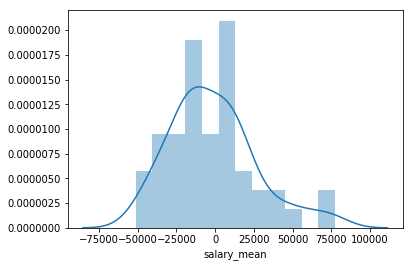

In [155]:
#Checking distribution of residuals
sns.distplot(residuals, bins=12)

The residuals of the target variable are slightly positively skewed but are still reasonably close to a normal distribution.

In [156]:
residuals.shape

(49,)

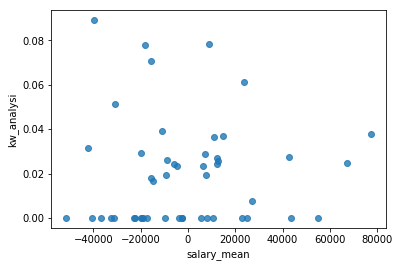

In [157]:
#Check for homoscedasticity.
sns.regplot(residuals, X_test['kw_analysi'], fit_reg=False)

Plotting residuals against various predictor variables doesn't show any obvious signs of heteroscedasticity, as there is no clear
trend in the residuals as these variables increase. Suggesting the assumptions of linear regression aren't violated.

We handled multicollinearity by excluding the variables with the highest correlation above. So it seems that the assumptions of 
linear regression are not violated here and that this is not the problem with my model.

# 3.4.7 How well is the model performing?

While the model is clearly over-fit to the training data, in order to properly evaluate how well it performs in general we need 
to compare its performance to a dummy regressor model.

In [158]:
from sklearn.dummy import DummyRegressor

In [159]:
dr = DummyRegressor()
dr.fit(Xsub_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [160]:
print('dummy r2: ', get_r2(dr, Xsub_test, y_test))
print('model r2: ', get_r2(optimalenet, Xsub_test, y_test))

dummy r2:  -0.02980980137243594
model r2:  0.3015520352783161


C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'predicted values')

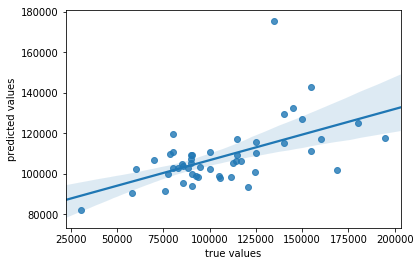

In [161]:
sns.regplot(y_test, y_hat)
plt.xlabel('true values')
plt.ylabel('predicted values')

In comparison to the dummy regressor, my linear model is performing relatively well, making predictions roughly 40% better than 
a baseline naive estimate.

# 3.4.8 What keywords have the greatest impact on salary?

In [162]:
optimalenet.coef_
enetcoef = pd.DataFrame({'feature':Xsub.columns, 'coefficient':optimalenet.coef_, 'abs':abs(optimalenet.coef_)})
enetcoef.sort_values('coefficient', ascending=False).head(15)

,abs,coefficient,feature
221,554.469968,554.469968,kw_experienc
159,552.156421,552.156421,kw_assist
102,532.965970,532.965970,kw_sql
2489,522.166852,522.166852,kw_repositories
2488,522.164214,522.164214,kw_gateway
2487,522.161285,522.161285,kw_powershel
2486,522.158082,522.158082,kw_etcif
2485,522.154627,522.154627,kw_flatflles
2484,522.150941,522.150941,kw_ssolid
2483,522.147049,522.147049,kw_noncloud


The keywords that have the biggest positive impact on predicted mean salary are listed above. Job listings that score highly on 
the word 'experienced' were more likely to have a higher predicted mean salary than those that don't. ('Scoring highly' in 
this context means having a higher tf-idf score for this word, that is that the job summary used this word more frequently than 
other job summaries). Other words such as 'assistants', 'sql' and 'repositories' also 
predicted higher salary, suggesting that perhaps private and financial sector jobs tend to have higher salaries. Interesting jobs
that scored highly for both 'major' and 'small' had higher predicted mean salaries. It is possible context is important in this 
case, and possibly using ngrams to look at the words in context would be a useful future step. Words that indicate a high-pressure 
environment like 'multitask', 'demanding' and 'tight' also predicted a higher salary, suggesting that if you want a high paying 
job, be prepared for stress.

In [207]:
enetcoef.sort_values('coefficient', ascending=True).head(15)

,abs,coefficient,feature
2518,4633.625832,-4633.625832,skill_excel
29,2182.261109,-2182.261109,state_AUS
47,2153.080304,-2153.080304,kw_research
30,1998.850935,-1998.850935,state_NSW
5,1646.395467,-1646.395467,title_research
28,1625.152561,-1625.152561,state_ACT
2516,1455.842055,-1455.842055,skill_tableau
27,1427.568727,-1427.568727,title_intelligence
2520,1299.130593,-1299.130593,skill_spss
191,1269.521790,-1269.521790,kw_secur


As for those keywords that had a negative impact on predicted salary, a few noticeable trends are present. Understandably, the 
word 'analyst' in both the summary and the job title predicted a lower salary. Amusingly, so did the words 'blue' and 'chip', 
suggesting that companies that self describe as 'blue chip' are perhaps not likely to pay as well. Disappointingly but in no way
surprisingly, the keyword 'research' also predicted a lower mean salary, suggesting that research roles are not the most 
lucrative way to go in the data industry. It appears also that shorter-term contract work also negatively impacts predicted 
salary, with words like 'intelligence', 'senior' and 'graduate' all being negative predictors as well.

# 3.4.9 Does it make more sense to binarize the data?

Would it make more sense to just look for the presence of a word in the title/summary, regardless of how many times it appears? 
For example, specific skills might be important but only be mentioned once in the summary. Taking the tf-idf scores may be 
masking the importance of one-off words.

In [208]:
def binarizer(x):
    if x > 0:
        v = 1
    else:
        v = 0
    return v

In [209]:
Xbin = pd.DataFrame([X[column].apply(binarizer) for column in X.columns]).transpose()

In [210]:
Xbin_train, Xbin_test, y_train, y_test = train_test_split(Xsub, y, test_size=0.5, random_state=11)

In [211]:
l1_ratios = np.linspace(0.01, 1.0, 25)
elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)
elasticnet.fit(Xbin_train,y_train)
optimalenet = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
optimalenet.fit(Xbin_train, y_train)

ElasticNet(alpha=0.011630585780071746, copy_X=True, fit_intercept=True,
      l1_ratio=0.051250000000000004, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [212]:
print('train r2: ', get_r2(optimalenet, Xbin_train, y_train))
print('test r2: ', get_r2(optimalenet,Xbin_test, y_test))

train r2:  0.8831541025107928
test r2:  0.04410890650104127


In terms of $r^2$ score, binarizing the data does not improve the performance of the model.

In [213]:
optimalenet.coef_
enetcoef = pd.DataFrame({'feature':Xsub.columns, 'coefficient':optimalenet.coef_, 'abs':abs(optimalenet.coef_)})
enetcoef.sort_values('abs', ascending=False).head(20)

,abs,coefficient,feature
2513,0.889751,0.889751,skill_python
31,0.537187,0.537187,state_NT
8,0.528823,0.528823,title_learning
32,0.461811,0.461811,state_QLD
28,0.432492,-0.432492,state_ACT
4,0.425282,0.425282,title_business
1158,0.399334,0.399334,kw_blockchain
5,0.373673,-0.373673,title_research
47,0.369103,-0.369103,kw_research
2520,0.331513,-0.331513,skill_spss


Overall, binarizing the data led to a model that does much better in terms of overfitting to the training data, but its overall 
performance is worse. Oddly, the only two features that impacted the prediction were being in the state NSW and listing python 
as a desired skill. Apparently this model predicts that if a job is in NSW and requires python skills, it's much more likely to 
pay well.

# 3.5 Classification modelling

Regression modelling led to some interesting observations, but I had some doubts about the efficacy of the model. Given the 
discontinuous distribution of the salary data, is it easier to predict salary if we define three categories: low, medium and high?

In [170]:
#Create a function to classify salary as high (2), medium (1) or low (0)
def salary_classifier(salary):
    if salary > 120000:
        c = 2
    elif salary > 80000:
        c = 1
    else:
        c = 0
    return c

In [171]:
#Create a new column by applying this function to the mean salary column
jobs_subset['salary_class'] = jobs_subset['salary_mean'].apply(salary_classifier)

C:\Users\sreej\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [172]:
#Are the classes balanced?
jobs_subset['salary_class'].value_counts()

1    45
2    32
0    21
Name: salary_class, dtype: int64

In [173]:
#What's the baseline accuracy?
baseline = len(jobs_subset[jobs_subset['salary_class'] == 1]) / len(jobs_subset['salary_class'])
baseline

0.45918367346938777

# 3.5.1 Define variables for classification

In [214]:
#Define new predictor variable
y = jobs_subset['salary_class']

In [215]:
#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 11, stratify=jobs_subset['salary_class'])

In [216]:
#Standardise X_train/X_test
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# 3.5.2 Classification with K-nearest neighbors

In [217]:
#Conduct a GridSearch to find optimal hyperparameters for KNN
knn_params = {'n_neighbors':[1,3,5,9,15,18,21,25],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 9, 15, 18, 21, 25], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [218]:
#Fit a K-nearest neighbours model
knn = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}


In [219]:
#Compare knn model accuracy to baseline
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print('model accuracy: ', knn.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.5306122448979592
baseline accuracy:  0.45918367346938777


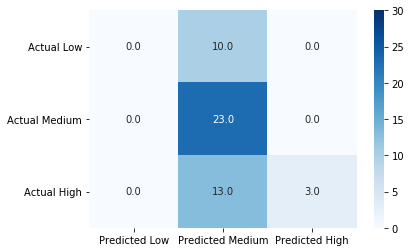

In [220]:
cm1 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])

The KNN model accuracy is slightly better than baseline.

# 3.5.3 Classification with support vector machine

In [225]:
#Gridsearch for optimal hyperparameters
svm = SVC()
gammas = np.logspace(-5, 2, 20)
Cs = np.logspace(-3, 2, 10)
kernels = ['rbf', 'sigmoid', 'linear', 'poly']
params = dict(gamma=gammas, C=Cs, kernel=kernels)
svm_gs = GridSearchCV(svm, params, cv=5, scoring='accuracy')
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.00000e-05, 2.33572e-05, 5.45559e-05, 1.27427e-04, 2.97635e-04,
       6.95193e-04, 1.62378e-03, 3.79269e-03, 8.85867e-03, 2.06914e-02,
       4.83293e-02, 1.12884e-01, 2.63665e-01, 6.15848e-01, 1.43845e+00,
       3.35982e+00, 7.84760e+00, 1.83298e+01, 4.28133e+01, 1.00....15443e+00, 7.74264e+00, 2.78256e+01, 1.00000e+02]), 'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [226]:
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 7.742636826811277, 'gamma': 1.438449888287663, 'kernel': 'sigmoid'}


In [227]:
svm_pred = svm_best.predict(X_test)
svm_score = svm_best.score(X_test, y_test)
print('model accuracy: ', svm_best.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.3469387755102041
baseline accuracy:  0.45918367346938777


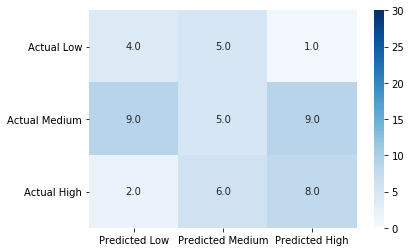

In [228]:
cm1 = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])

# 3.5.4 Classification with decision trees

In [229]:
#Gridsearch again for hyperparameters
params = {'max_depth':[3,4,5],
         'max_leaf_nodes':[2,3,4],
         'min_samples_split':[2,3,4,5,10,15,25],
         'max_features':[5,10,50,100,500]}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [2, 3, 4], 'min_samples_split': [2, 3, 4, 5, 10, 15, 25], 'max_features': [5, 10, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [230]:
dtc = dtc_gs.best_estimator_
print(dtc_gs.best_params_)

{'max_depth': 3, 'max_features': 100, 'max_leaf_nodes': 4, 'min_samples_split': 3}


In [231]:
dtc_pred = dtc.predict(X_test)
dtc_score = dtc.score(X_test, y_test)
print('model accuracy: ', dtc.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.46938775510204084
baseline accuracy:  0.45918367346938777


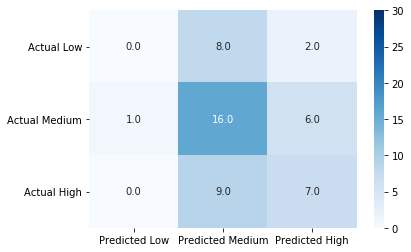

In [232]:
cm1 = confusion_matrix(y_test, dtc_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])

In [233]:
#With bagging
bag = BaggingClassifier(dtc, max_samples=1.0,random_state=5)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=100, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=5, verbose=0, warm_start=False)

In [234]:
bag_pred = bag.predict(X_test)
bag_score = bag.score(X_test, y_test)
print('model accuracy: ', bag.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.5102040816326531
baseline accuracy:  0.45918367346938777


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.51      0.91      0.66        23
          2       0.50      0.25      0.33        16

avg / total       0.40      0.51      0.42        49



C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


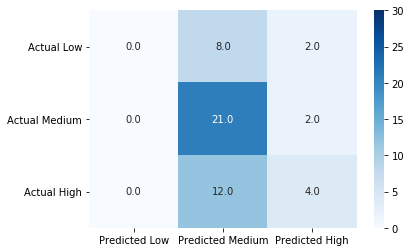

In [235]:
cm1 = confusion_matrix(y_test, bag_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])
print(classification_report(y_test,bag_pred))

In [236]:
rf_params = {'n_estimators': [5,10,15,30,50],
            'max_features':[5,20,50,100,250,500],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,20,25]
            }

rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(X_train, y_train)
rf = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_features': 50, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30}


In [237]:
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('model accuracy: ', rf.score(X_test, y_test))
print('baseline accuracy: ', baseline)

model accuracy:  0.4897959183673469
baseline accuracy:  0.45918367346938777


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.49      0.87      0.62        23
          2       0.50      0.25      0.33        16

avg / total       0.39      0.49      0.40        49



C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


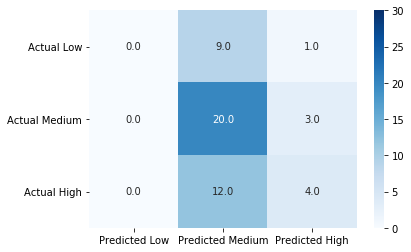

In [238]:
cm1 = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm1, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted Low','Predicted Medium','Predicted High'], 
            yticklabels = ['Actual Low', 'Actual Medium', 'Actual High'])
print(classification_report(y_test,rf_pred))

# 3.5.5 Classification model summary

In [239]:
models = ['KNN','SVM','DecisionTree','Bagging','RandomForest','Baseline']
accuracy = [knn_score, svm_score, dtc_score, bag_score,rf_score, baseline]
class_summary = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
class_summary = class_summary.set_index('Model')

In [240]:
class_summary

,Accuracy
Model,
KNN,0.530612
SVM,0.346939
DecisionTree,0.469388
Bagging,0.510204
RandomForest,0.489796
Baseline,0.459184


KNN achieved the highest accuracy, with an ensemble bagging classifier achieving the second-highest accuracy. All of the classification models peformed better than baseline, otherthan SVM.

Unforunately, there is no simple way to extract feature weights or importances for either DecisionTree or RandomForest classifier. The random forest model was the next most accurate so I will look at the feature importances from this model.

In [241]:
importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature':X.columns, 'importance':importance}).sort_values('importance', ascending= False)
importance_df.head(10)

,feature,importance
217,kw_au,0.044463
108,kw_candid,0.041677
120,kw_drive,0.038194
128,kw_base,0.033333
65,kw_process,0.033333
538,kw_view,0.032732
40,kw_analyt,0.028606
59,kw_servic,0.028094
228,kw_thi,0.024381
114,kw_relat,0.022855


Both 'learning' in the job title and 'model' in the job summary appear to be important for classifying the salary level of the 
job, suggesting that carrying out machine learning and modelling affects the level of pay. 'Scientist' also appears in the list,
suggesting that perhaps data scientist jobs (where one would likely be doing more machine learning) are typically in a different
pay grade to other jobs. The keyword 'head' also appears, unsurprisingly, suggesting that leadership positions also have an 
impact on salary class.

# 3.6 Imputing values for full dataset

Since a large number of rows in my original dataset were missing information for the salary, I can use the models above to 
attempt to impute values. One caveat here is that I am attempting to impute values to a large number of rows using models built 
on only a small minority of the total rows. Furthermore, none of my models achieved above 64% accuracy, so a large number of the
predicted rows can be expected to be incorrect. While I will still go ahead and impute this data, I may elect to drop these 
variables in future modelling.

In [242]:
#Imputing mean salary using linear regression.
#Define null-value predictors
null_salary = jobs[jobs['salary_mean'].isnull()==True]
Xnull = null_salary.iloc[:,7:]
dropcols = ['title_machine','kw_machin','kw_environment']
Xnull.drop(dropcols, axis=1, inplace=True)
Xnull_sub = Xnull[rfesupported.feature]

In [243]:
#Predict mean salary using elastic net regression model
l1_ratios = np.linspace(0.01, 1.0, 25)
elasticnet = ElasticNetCV(l1_ratio = l1_ratios,n_alphas = 200, cv=10)
elasticnet.fit(Xsub_train,y_train)
optimalenet = ElasticNet(alpha = elasticnet.alpha_, l1_ratio = elasticnet.l1_ratio_)
optimalenet.fit(Xsub_train, y_train)

ElasticNet(alpha=27.010545670198585, copy_X=True, fit_intercept=True,
      l1_ratio=0.01, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [244]:
predicted = optimalenet.predict(Xnull_sub)

In [245]:
#Impute these values to the mean salary column
null_salary['salary_mean'] = predicted*100000

C:\Users\sreej\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [246]:
#Predict salary classes using bag ensemble model
predicted_class = svm_best.predict(Xnull)

In [247]:
#Impute to data frame
null_salary['salary_class'] = predicted_class
null_salary['salary_class'].value_counts()
#This is just applying one class to everything. This will not be useful for clustering and will likely be dropped.

C:\Users\sreej\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2    152
1    126
0    102
Name: salary_class, dtype: int64

In [248]:
#Concatenate these with the rows that had pre-existing salary information to form a full dataset.
jobs_full = pd.concat([null_salary, jobs_subset])
jobs_full.set_index('index', inplace=True)

In [249]:
jobs_full.head()

,company,title,salary_low,salary_high,salary_mean,title_data,title_analyst,title_scientist,title_senior,title_engineer,...,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka,salary_class
index,,,,,,,,,,,,,,,,,,,,,
0,Allianz,DATA SCIENTIST,NaN,NaN,110204.081633,0.601265,0.0,0.799049,0.0,0.0,...,0,0,0,1,0,1,0,0,0,1
1,Teradata,Data Scientist,NaN,NaN,110204.081633,0.601265,0.0,0.799049,0.0,0.0,...,1,1,0,1,1,0,0,0,0,2
2,carsales.com.au,Data Scientist - 12 month contract,NaN,NaN,110204.081633,0.202216,0.0,0.268734,0.0,0.0,...,0,0,0,1,1,1,1,0,0,1
3,EY,Data Scientist - Melbourne,NaN,NaN,110204.081633,0.323487,0.0,0.429897,0.0,0.0,...,0,0,1,1,0,1,1,0,0,2
4,Culture Amp,Data Scientist,NaN,NaN,110204.081633,0.601265,0.0,0.799049,0.0,0.0,...,1,1,0,1,0,0,0,0,0,2


In [250]:
#Export to a .csv file for use in question 2
filename = 'jobs_full.csv'
jobs_full.to_csv(filename)